In [1]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils.Tree import TreePDF
from data.data_loader import generateGauss
from utils.integral import grid

# ==== 1. Sinh dữ liệu PDF (Gaussian) ====
bandwidth = 0.01
grid_x    = grid(bandwidth, start=-5, end=15)
mu        = np.array([0.3, 4.0, 9.1, 1.0, 5.5, 8.0, 4.8])
sig       = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
pdfs      = generateGauss(mu, sig, grid_x)


ModuleNotFoundError: No module named 'utils.Tree'

In [ ]:
# ==== 2. Huấn luyện TreePDF ====
tree = TreePDF(k=3, grid_x=grid_x, max_leaves=7, distance_metric='L2',
               bandwidth=bandwidth, verbose=1)
labels = tree.fit_predict(pdfs)


Finding 3-means with KCF


In [ ]:
# ==== 3. Hàm lấy danh sách split threshold ====
def get_splits(node):
    splits = []
    if not node.is_leaf():
        splits.append(node.value)  # threshold tại node
        splits.extend(get_splits(node.left))
        splits.extend(get_splits(node.right))
    return splits

split_positions = get_splits(tree.tree)
print("Vị trí split:", split_positions)

Vị trí split: [np.float64(-1.900000000000066), np.float64(4.249999999999803)]


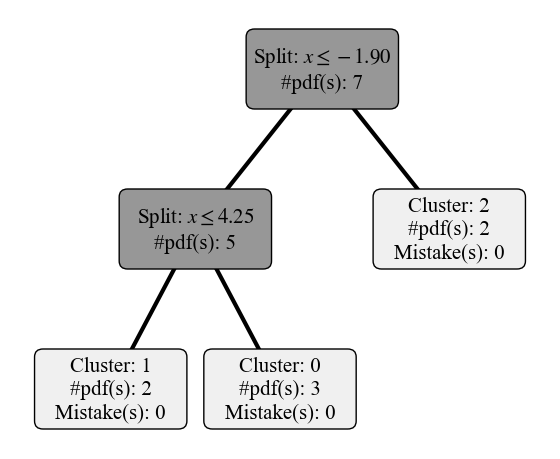

In [ ]:
# ==== 4. Vẽ cây ====
tree.plot()